In [1]:
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib  inline
import tensorflow as tf
from tensorflow import keras
import scipy.integrate
import scipy.special
from keras.models import Sequential
from keras.layers import Activation,Dropout,Conv2D,MaxPooling2D,Flatten,Dense,BatchNormalization
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
%matplotlib inline
from sklearn.metrics import classification_report
from keras.preprocessing.image import ImageDataGenerator

In [2]:
train_dir = r'G:\771768 PROGRAMMING FOR AI DS\UNDERSTANDING AI\Emergence_vehicle_dataset\Emergency_Vehicles\train' # C:\Users\user\Desktop\Understanding AI resources\CNN resources\Emergency_Vehicles\train' 
test_dir = r'G:\771768 PROGRAMMING FOR AI DS\UNDERSTANDING AI\Emergence_vehicle_dataset\Emergency_Vehicles\test'  # C:\Users\user\Desktop\Understanding AI resources\CNN resources\Emergency_Vehicles\test'

In [3]:
image = cv2.imread(r'G:\771768 PROGRAMMING FOR AI DS\UNDERSTANDING AI\Emergence_vehicle_dataset\Emergency_Vehicles\train\0.jpg')
image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB) # converting to RGB 


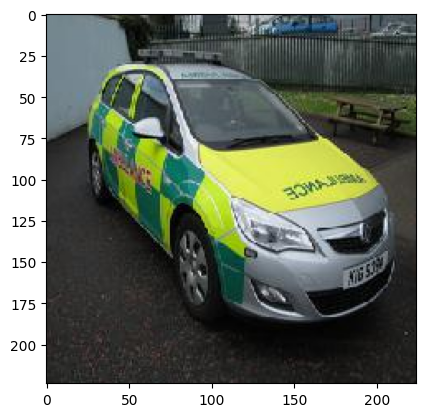

In [4]:
plt.imshow(image)

In [5]:
image.shape

(224, 224, 3)

In [6]:
image_gen = ImageDataGenerator(
    rotation_range = 20,
    width_shift_range = 0.1,
    height_shift_range = 0.1,
    shear_range = 0.20,
    zoom_range = 0.20,
    fill_mode = 'nearest',
    horizontal_flip = True,
    rescale = 1 / 255





)

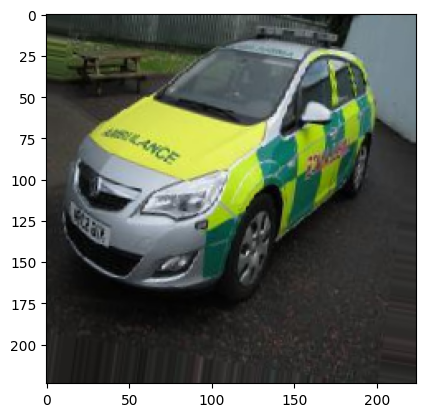

In [7]:
# showing the transformation
plt.imshow(image_gen.random_transform(image))

In [8]:
train_df = pd.read_csv('train.csv')


In [9]:
train_df

,image_names,emergency_or_not
0,1503.jpg,0
1,1420.jpg,0
2,1764.jpg,0
3,1356.jpg,0
4,1117.jpg,0
...,...,...
1641,1638.jpg,0
1642,1095.jpg,0
1643,1130.jpg,0
1644,1294.jpg,0


In [10]:
train_df['emergency_or_not'] = train_df['emergency_or_not'].astype(str)

In [11]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1646 entries, 0 to 1645
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   image_names       1646 non-null   object
 1   emergency_or_not  1646 non-null   object
dtypes: object(2)
memory usage: 25.8+ KB


In [12]:
train_generator=image_gen.flow_from_dataframe(dataframe=train_df[:1150], # specify the dataset used for trainin
 directory=train_dir,
 x_col='image_names',
 y_col='emergency_or_not',
 class_mode='binary', 
 target_size=(224,224), 
 batch_size=50
 )
validation_generator=image_gen.flow_from_dataframe(dataframe=train_df[1150:], 
 directory=train_dir,
 x_col='image_names', 
 y_col='emergency_or_not', 
 class_mode='binary', 
 target_size=(224,224), 
 batch_size=50
                                                  )

Found 1150 validated image filenames belonging to 2 classes.
Found 496 validated image filenames belonging to 2 classes.


In [13]:
model_1 = Sequential()
model_1.add(Conv2D(filters = 8, kernel_size = (3,3), padding = 'same', activation = 'relu',input_shape = (224, 224, 3)))
model_1.add(MaxPooling2D(pool_size = (2,2)))
model_1.add(Flatten())
model_1.add(Dense(units = 100, activation = 'relu'))
model_1.add(Dropout(0.2))
model_1.add(Dense(units = 1, activation = 'sigmoid'))

In [14]:
model_2 = Sequential()
model_2.add(Conv2D(filters = 8,
                       kernel_size = (3,3), 
                       padding = 'same', 
                       activation = 'relu',
                       input_shape = (224, 224, 3)))

model_2.add(MaxPooling2D(pool_size = (2,2)))

model_2.add(Conv2D(filters = 16,
               kernel_size = (3,3), 
               padding = 'same', 
               activation = 'relu',
               input_shape = (224, 224, 3)))
model_2.add(MaxPooling2D(pool_size = (2,2)))

model_2.add(Flatten())

model_2.add(Dense(units = 100, activation = 'relu'))
model_2.add(Dropout(0.2))
model_2.add(Dense(units = 1, activation = 'sigmoid'))



In [15]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 8)       224       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 8)      0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 100352)            0         
                                                                 
 dense (Dense)               (None, 100)               10035300  
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 101       
                                                        

In [16]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 224, 224, 8)       224       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 112, 112, 8)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 112, 112, 16)      1168      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 56, 56, 16)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 50176)             0         
                                                                 
 dense_2 (Dense)             (None, 100)              

In [17]:
model_1.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = 'accuracy')


In [18]:
model_2.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = 'accuracy')

# Training Stage

In [19]:
history = model_1.fit(train_generator, epochs = 10, validation_data = validation_generator)

Epoch 1/10
23/23 [==============================] - 39s 2s/step - loss: 2.1278 - accuracy: 0.5530 - val_loss: 0.7284 - val_accuracy: 0.6069
Epoch 2/10
23/23 [==============================] - 33s 1s/step - loss: 0.6710 - accuracy: 0.6365 - val_loss: 0.6224 - val_accuracy: 0.6633
Epoch 3/10
23/23 [==============================] - 34s 1s/step - loss: 0.6294 - accuracy: 0.6609 - val_loss: 0.6012 - val_accuracy: 0.7097
Epoch 4/10
23/23 [==============================] - 34s 1s/step - loss: 0.6108 - accuracy: 0.6713 - val_loss: 0.5961 - val_accuracy: 0.6935
Epoch 5/10
23/23 [==============================] - 34s 2s/step - loss: 0.5876 - accuracy: 0.7061 - val_loss: 0.5637 - val_accuracy: 0.7157
Epoch 6/10
23/23 [==============================] - 35s 2s/step - loss: 0.5775 - accuracy: 0.7061 - val_loss: 0.5525 - val_accuracy: 0.7198
Epoch 7/10
23/23 [==============================] - 38s 2s/step - loss: 0.5684 - accuracy: 0.7226 - val_loss: 0.5111 - val_accuracy: 0.7560
Epoch 8/10
23/23 [==

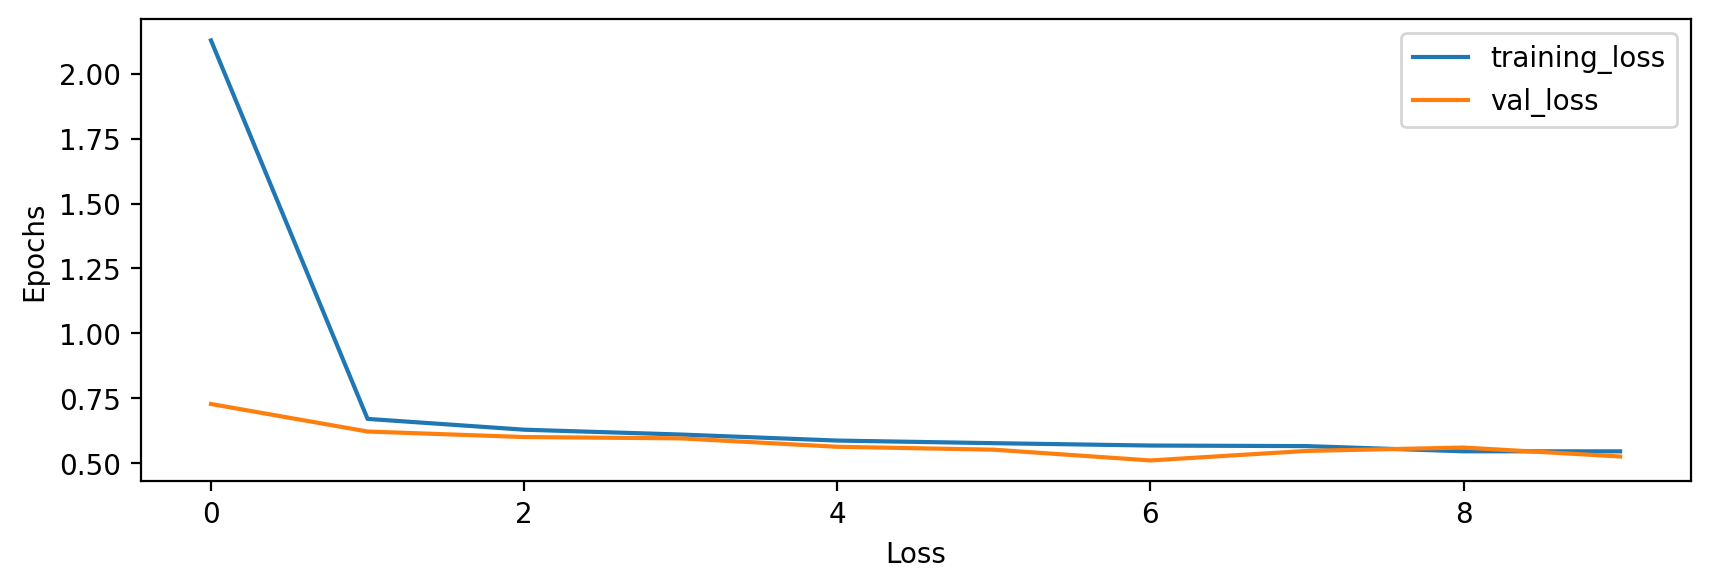

In [20]:
## checking for overfitting
history_df = pd.DataFrame(history.history)
plt.figure(dpi=200, figsize = (10,3))
plt.plot(history_df['loss'],
 label='training_loss')
plt.plot(history_df['val_loss'],
 label='val_loss')
plt.xlabel('Loss')
plt.ylabel('Epochs')
plt.legend()
plt.show()
#https://stackoverflow.com/questions/65907905/when-to-tell-if-our-cnn-model-is-overfitting#:~:text=If%20you%20see%20that%20your,and%20should%20not%20be%20generalized...

In [21]:
history_df

,loss,accuracy,val_loss,val_accuracy
0,2.127839,0.553043,0.728358,0.606855
1,0.671018,0.636522,0.622417,0.663306
2,0.629430,0.660870,0.601172,0.709677
3,0.610823,0.671304,0.596101,0.693548
4,0.587572,0.706087,0.563689,0.715726
5,0.577548,0.706087,0.552478,0.719758
6,0.568450,0.722609,0.511076,0.756048
7,0.566247,0.724348,0.547831,0.756048
8,0.546301,0.724348,0.560721,0.737903
9,0.546097,0.746957,0.526201,0.760081


In [22]:
history1 = model_2.fit(train_generator, epochs = 10, validation_data = validation_generator)

Epoch 1/10
23/23 [==============================] - 36s 2s/step - loss: 1.5762 - accuracy: 0.5374 - val_loss: 0.6544 - val_accuracy: 0.6270
Epoch 2/10
23/23 [==============================] - 35s 2s/step - loss: 0.6428 - accuracy: 0.6426 - val_loss: 0.5778 - val_accuracy: 0.7359
Epoch 3/10
23/23 [==============================] - 34s 2s/step - loss: 0.5946 - accuracy: 0.6983 - val_loss: 0.5596 - val_accuracy: 0.7581
Epoch 4/10
23/23 [==============================] - 36s 2s/step - loss: 0.5739 - accuracy: 0.7104 - val_loss: 0.5151 - val_accuracy: 0.7520
Epoch 5/10
23/23 [==============================] - 42s 2s/step - loss: 0.5688 - accuracy: 0.7052 - val_loss: 0.5339 - val_accuracy: 0.7520
Epoch 6/10
23/23 [==============================] - 38s 2s/step - loss: 0.5523 - accuracy: 0.7357 - val_loss: 0.5170 - val_accuracy: 0.7621
Epoch 7/10
23/23 [==============================] - 38s 2s/step - loss: 0.5335 - accuracy: 0.7591 - val_loss: 0.4694 - val_accuracy: 0.7661
Epoch 8/10
23/23 [==

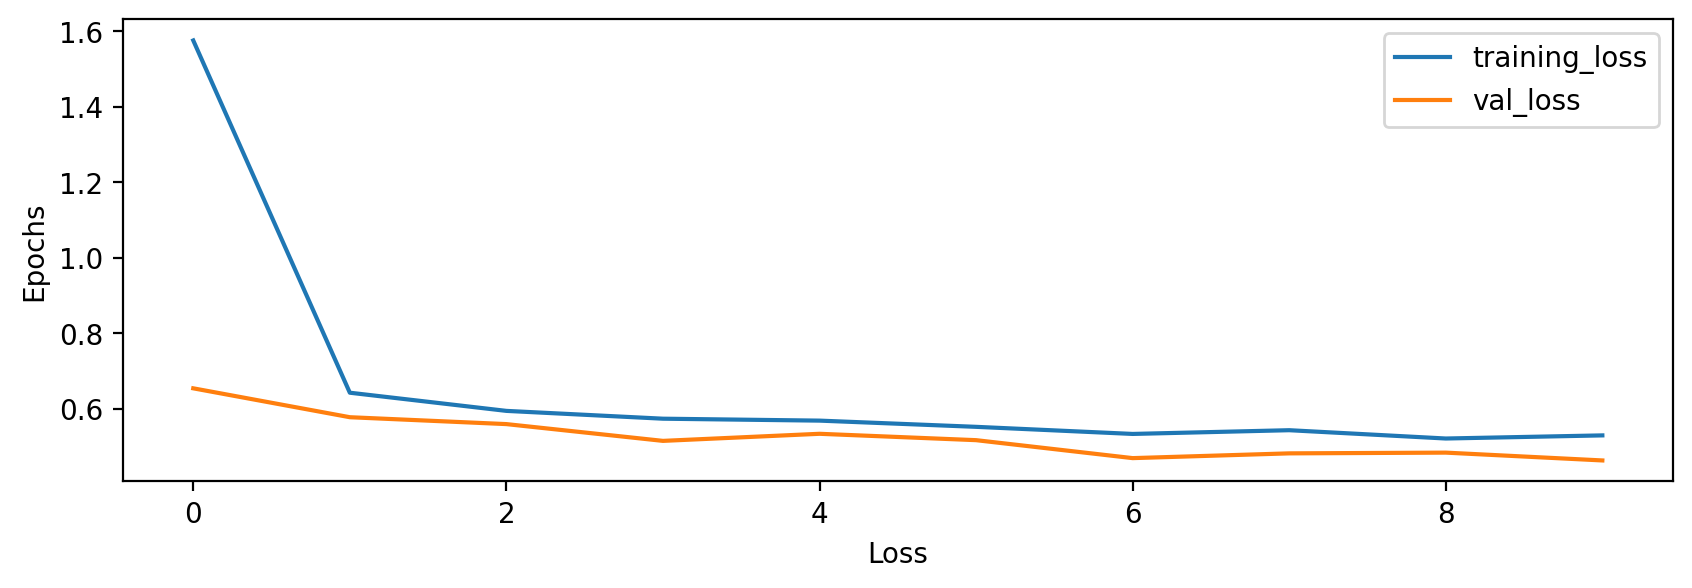

In [23]:
## checking for overfitting
history1_df = pd.DataFrame(history1.history)
plt.figure(dpi=200, figsize = (10,3))
plt.plot(history1_df['loss'],
 label='training_loss')
plt.plot(history1_df['val_loss'],
 label='val_loss')
plt.xlabel('Loss')
plt.ylabel('Epochs')
plt.legend()
plt.show()
#https://stackoverflow.com/questions/65907905/when-to-tell-if-our-cnn-model-is-overfitting#:~:text=If%20you%20see%20that%20your,and%20should%20not%20be%20generalized...

In [24]:
history1_df

,loss,accuracy,val_loss,val_accuracy
0,1.576163,0.537391,0.654402,0.627016
1,0.642751,0.642609,0.577824,0.735887
2,0.594603,0.698261,0.559583,0.758065
3,0.573903,0.710435,0.515136,0.752016
4,0.568801,0.705217,0.533902,0.752016
5,0.552342,0.735652,0.517016,0.762097
6,0.533529,0.759130,0.469435,0.766129
7,0.543413,0.732174,0.482040,0.786290
8,0.521397,0.762609,0.483994,0.770161
9,0.529668,0.751304,0.463285,0.794355


# Model Testing

In [25]:
test_df = pd.read_csv('test_modified.csv')
test_df

,image_names,class
0,1960.jpg,0
1,668.jpg,1
2,2082.jpg,0
3,808.jpg,1
4,1907.jpg,0
...,...,...
695,674.jpg,1
696,1027.jpg,0
697,447.jpg,1
698,2176.jpg,0


In [26]:
test_df['class'] = test_df['class'].astype(str)

In [27]:
test_generator=image_gen.flow_from_dataframe(dataframe=test_df, # specify the dataset used for training
 directory=test_dir,
 x_col='image_names',
 y_col='class',
 class_mode='binary', 
 target_size=(224,224), 
 batch_size=706
 )

                     

Found 700 validated image filenames belonging to 2 classes.


In [28]:
pred = model_1.predict(test_generator[0][0])

pred = [0 if x[0] < 0.5 else 1 for x in pred]

pred[:10]

22/22 [==============================] - 1s 48ms/step


[0, 1, 0, 0, 0, 0, 1, 1, 0, 1]

In [29]:
true_labels = test_generator[0][1]

In [30]:
print(classification_report(true_labels, pred))

              precision    recall  f1-score   support

         0.0       0.80      0.75      0.78       408
         1.0       0.68      0.74      0.71       292

    accuracy                           0.75       700
   macro avg       0.74      0.75      0.74       700
weighted avg       0.75      0.75      0.75       700



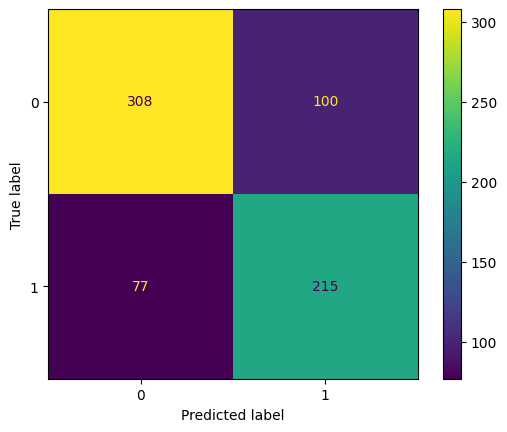

In [31]:
cm  = confusion_matrix(true_labels, pred)
ax = ConfusionMatrixDisplay(cm)

ax.plot()

In [32]:
pred = model_2.predict(test_generator[0][0])

pred = [0 if x[0] < 0.5 else 1 for x in pred]

pred[:10]

22/22 [==============================] - 1s 57ms/step


[0, 0, 0, 0, 0, 0, 1, 1, 0, 0]

In [33]:
true_labels = test_generator[0][1]

In [34]:
print(classification_report(true_labels, pred))

              precision    recall  f1-score   support

         0.0       0.76      0.80      0.78       408
         1.0       0.70      0.65      0.67       292

    accuracy                           0.74       700
   macro avg       0.73      0.72      0.73       700
weighted avg       0.73      0.74      0.73       700



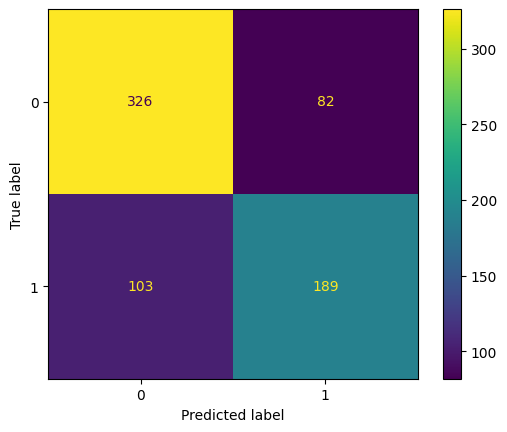

In [35]:
cm  = confusion_matrix(true_labels, pred)
ax = ConfusionMatrixDisplay(cm)

ax.plot()